# Gradient Descent

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/optim/Gradient_Descent.ipynb)

This example implements a basic gradient desscent optimizer to find minima in a potential function.

In [1]:
%pip install --quiet phiflow
from phi.torch.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.

We begin by defining a potential function.

<Figure size 288x216 with 2 Axes>

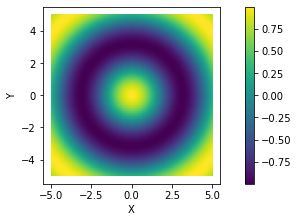

In [3]:
def potential(pos):
    return math.cos(math.vec_length(pos))

landscape = CenteredGrid(potential, x=100, y=100, bounds=Box(x=(-5, 5), y=(-5, 5)))
plot(landscape, size=(4, 3))

Using `math.gradient`, we can plot the gradient at each point.

<Figure size 216x216 with 1 Axes>

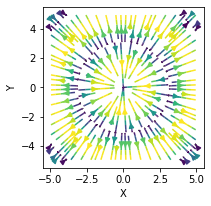

In [6]:
pot_grad = math.gradient(potential, 'pos', get_output=False)
plot(landscape.with_values(pot_grad) * .2, size=(3, 3))

Now, let's define a simple gradient descent step with step size $\eta = 0.1$.
To test it, we plot the optimization trajectory starting at $(1, 0)$ which should converge to towards $(\pi,0)$.

c:\phd\phiflow2\phiml\phiml\math\_functional.py:600: RuntimeWarning: Using torch for gradient computation because numpy does not support jacobian()
  warnings.warn(f"Using {math.default_backend()} for gradient computation because {key.backend} does not support jacobian()", RuntimeWarning)


<Figure size 360x144 with 2 Axes>

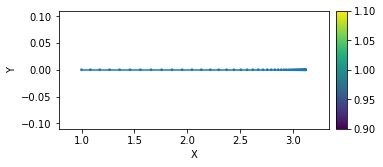

In [8]:
def gradient_descent_step(x):
    return x - .1 * pot_grad(x)

x0 = vec(x=1, y=0)
opt_trj = iterate(gradient_descent_step, batch(iter=50), x0)
plot(opt_trj.iter.as_spatial(), size=(5, 2))

Finally, let's visualize the trajectories of all grid points. We have to change the dimension type to `batch` in order for the optimizations to work in parallel.

In [13]:
x0 = rename_dims(landscape.points, spatial, batch)
opt_trj = iterate(gradient_descent_step, batch(iter=50), x0)
plot([landscape, rename_dims(opt_trj, 'x,y', instance)], animate='iter', color='white', alpha=[1, .2], overlay='list', size=(6, 5))